In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

In [2]:
gt_list = sorted(glob.glob('./result/GT*.jpg'))
seg_list = sorted(glob.glob('./result/SEG*.jpg'))
img_list = sorted(glob.glob('./result/IMAGE*.jpg'))

print(len(gt_list), len(seg_list))


700 700


In [3]:
gt_list[0]

'./result/GT_0_1.jpg'

In [4]:

def get_DSC_acc(gt_list, seg_list):
    
    DSC_list = []
    for i in range(len(gt_list)):
        
        GT = cv2.imread(gt_list[i], 0)/255
        GT[GT > 0.5] = 1
        GT[GT <= 0.5] = 0

        AUTO = cv2.imread(seg_list[i], 0)/255
        AUTO[AUTO > 0.5] = 1
        AUTO[AUTO <= 0.5] = 0

        A_Intersect_G = np.multiply(AUTO, GT)
                
        DSC = (2 * np.sum(A_Intersect_G)) / (np.sum(AUTO) + np.sum(GT))
        DSC_list.append(DSC)
    
    return DSC_list




In [5]:
DSC_list = get_DSC_acc(gt_list, seg_list)
j=0
for i in range(len(DSC_list)):
    
    if DSC_list[i] == 0.0:
        j += 1
        
print(j)

print(sum(DSC_list)/700)

81
0.7307853894638551


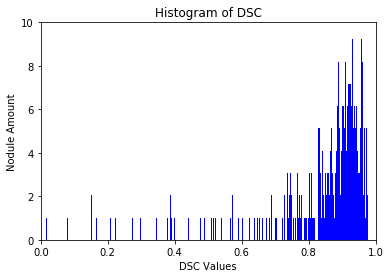

In [6]:
#plt.hist(DSC_list, len(DSC_list))
plt.hist(DSC_list, 700, density=True, facecolor='b', alpha=1)


plt.xlabel('DSC Values')
plt.ylabel('Nodule Amount')
plt.title('Histogram of DSC')

plt.xlim(0.0, 1.0)
plt.ylim(0, 10)
plt.show()
